In [1024]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [1025]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [1026]:
train=train.reset_index(drop=True)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,6,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,12,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,2,YES
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,6,UNKNOWN
796,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
797,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,UNKNOWN
798,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,NO


In [1027]:
temp1=train.copy()

In [1028]:
#for indexi, strings in temp1.iterrows():    
#    if "YES" ==str(strings["CLASS"].strip()):
#       train.at[indexi,"incompatibilidad"]=0

In [1029]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,6,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,12,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,2,YES
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,6,UNKNOWN
796,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
797,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,UNKNOWN
798,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,NO


<Axes: title={'center': 'incompatibilidad'}, xlabel='CLASS'>

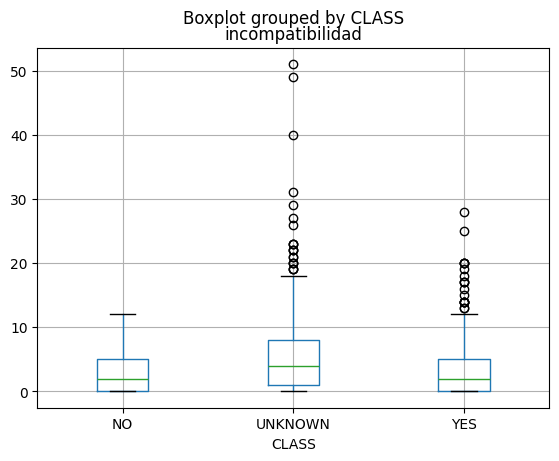

In [1030]:
train.boxplot(by="CLASS",column=["incompatibilidad"])

In [1031]:
#train=train.drop(["antonimos","sim_faltantes","distancias","suma","entropias"],axis=1)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,6,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,12,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,2,YES
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,6,UNKNOWN
796,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
797,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,UNKNOWN
798,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,NO


In [1032]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [1033]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [1034]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

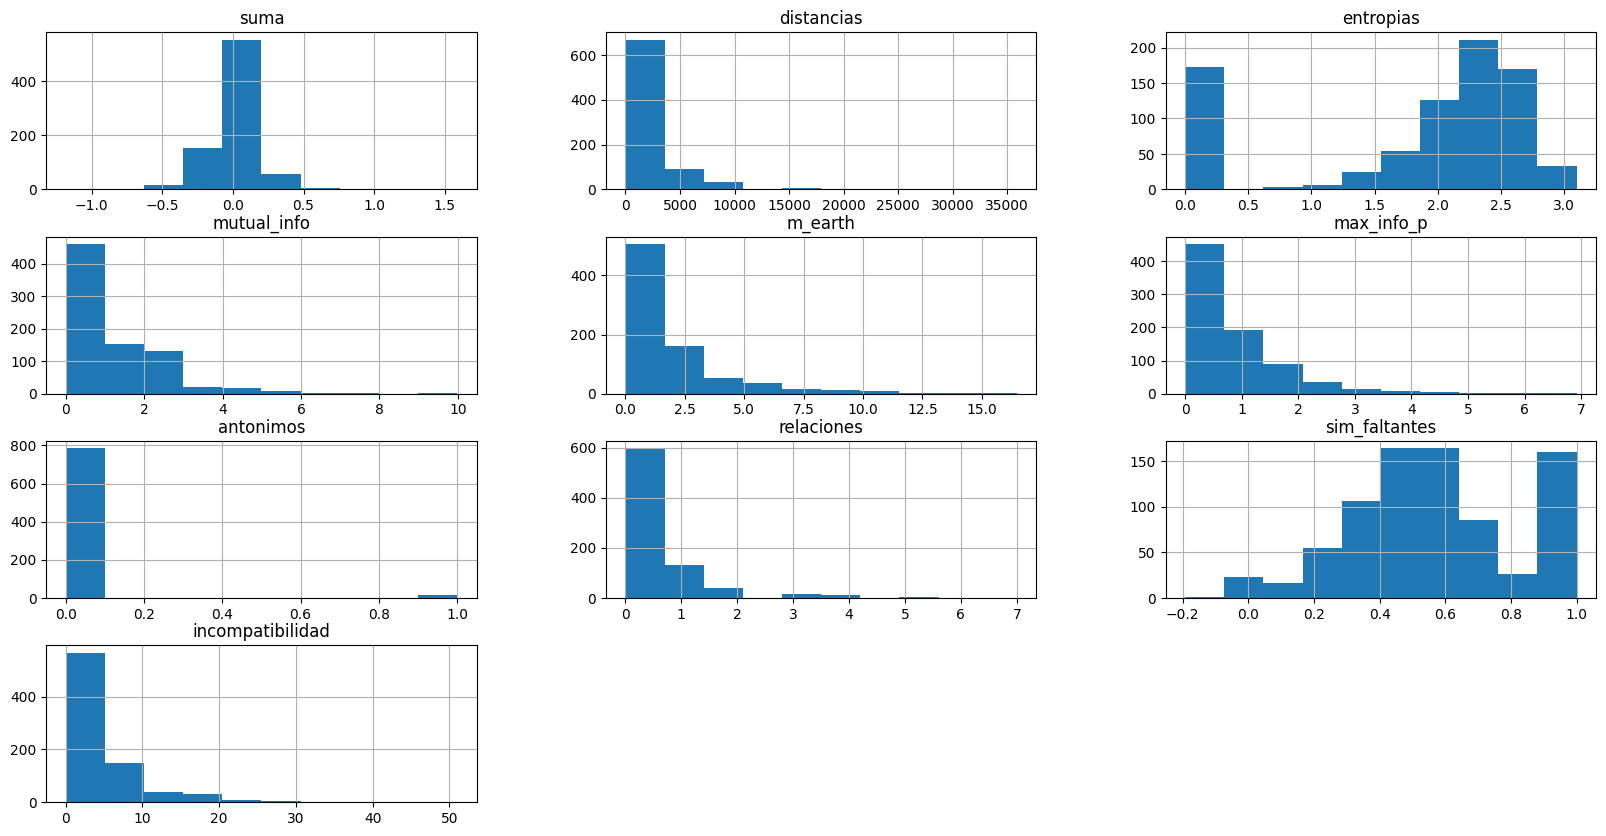

In [1035]:
train.hist(figsize=(20,10))
plt.show()

In [1036]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [1037]:
test=test.reset_index(drop=True)

In [1038]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [1039]:
#test=test.drop(["antonimos","sim_faltantes","distancias","suma","entropias"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,-0.176353,4051.2014,2.093,1.415909e+00,7.061271,0.919573,0,0,0.457370,7,YES
1,-0.006087,1441.6440,2.149,7.099558e-01,0.701502,0.393066,0,0,0.338005,6,YES
2,0.000000,536.2693,0.000,1.609823e-13,4.289287,0.000000,0,0,0.000000,0,YES
3,0.000000,0.0000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.068107,863.1677,2.468,6.870561e-01,0.973838,0.412710,0,0,0.413161,3,NO
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.107113,1861.5322,1.864,7.052404e-01,1.067078,0.276587,0,1,0.215729,9,YES
796,0.000000,0.0000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,NO
797,0.042652,1257.3066,2.208,6.977210e-01,0.589826,0.467463,0,0,0.485553,1,UNKNOWN
798,0.021256,632.9640,1.549,6.852396e-01,1.010164,0.353093,0,0,0.234342,1,UNKNOWN


In [1040]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [1041]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [1042]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [1043]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [1044]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [1045]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [1046]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1047]:
model.decision_function(X)

array([ 9.13144803e-01, -2.65099116e-01,  4.95747565e-01,  9.13144803e-01,
        1.25952263e-01,  5.86281182e-01,  9.13144803e-01,  9.13144803e-01,
       -6.14197031e-02, -1.25437821e+00,  1.25968362e-01,  9.13144803e-01,
        3.99756600e-01,  4.55080957e-01,  6.18037018e-01,  9.13144803e-01,
       -3.85519343e-01,  3.03691712e-01,  4.96139891e-01,  3.84651031e-01,
        5.58739390e-01,  1.70958334e-01,  5.56791669e-01,  4.76320363e-01,
       -7.06584292e-02,  3.41156041e-01,  2.99049754e-01,  2.37145205e-01,
        3.44063125e-01,  3.78928265e-01,  4.91382926e-01,  4.44107205e-01,
        2.95509356e-01,  3.36501383e-01,  3.96195457e-01,  2.16420362e-01,
        5.53412215e-01,  5.93442194e-01,  3.54809544e-01,  9.13144803e-01,
        4.51162370e-01,  2.77889296e-01, -4.70732287e-01,  6.93338925e-01,
        3.08483048e-01,  5.85543858e-01,  4.03405075e-01,  4.81126595e-01,
        4.33893973e-01,  5.25624045e-01, -1.69117503e-01,  5.00518584e-01,
       -1.03481480e+00,  

In [1048]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes',
       'incompatibilidad'],
      dtype='object')

In [1049]:
model.classes_

array([0, 1])

In [1050]:
model.coef_[0]

array([ 0.0600104 , -0.35343045, -0.09719523, -1.56714765,  0.29099765,
        0.65953972,  0.01017742, -0.10208548, -0.0015789 ,  0.25819233])

In [1051]:
coeficientes=model.coef_[0]

In [1052]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  5 max_info_p 3 mutual_info


In [1053]:
n_columns=train.shape[1]-1

In [1054]:
n_columns

10

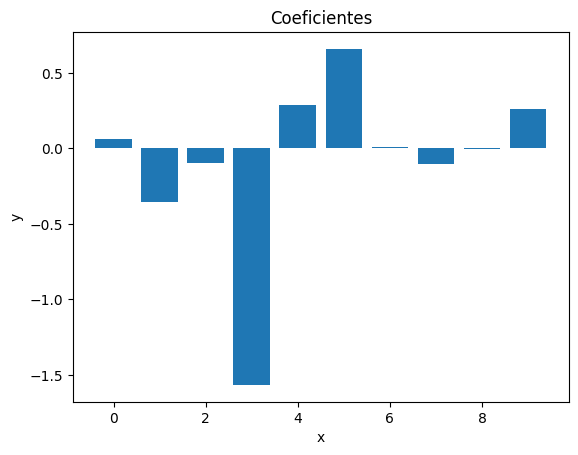

In [1055]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [1056]:
predictions = model.predict(X_test)

In [1057]:
print(confusion_matrix(y_test, predictions))

[[188 202]
 [120 290]]


In [1058]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.6
precision:  0.59
recall 0.71
f1_score:  0.64
matthews_score:  0.19


In [1059]:
X_train.shape

(800, 10)

In [1060]:
X_test.shape

(800, 10)

In [1061]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [1062]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [1063]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.079721)


In [1064]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.740000 (0.071906)


In [1065]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.660000 (0.064265)


In [1066]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.220000 (0.116427)


In [1067]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [1068]:
#linear_model

In [1069]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [1070]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.48      0.61      0.54       308
           1       0.71      0.59      0.64       492

    accuracy                           0.60       800
   macro avg       0.59      0.60      0.59       800
weighted avg       0.62      0.60      0.60       800



In [1071]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [1072]:
explainer.expected_value

-0.1156015304278508

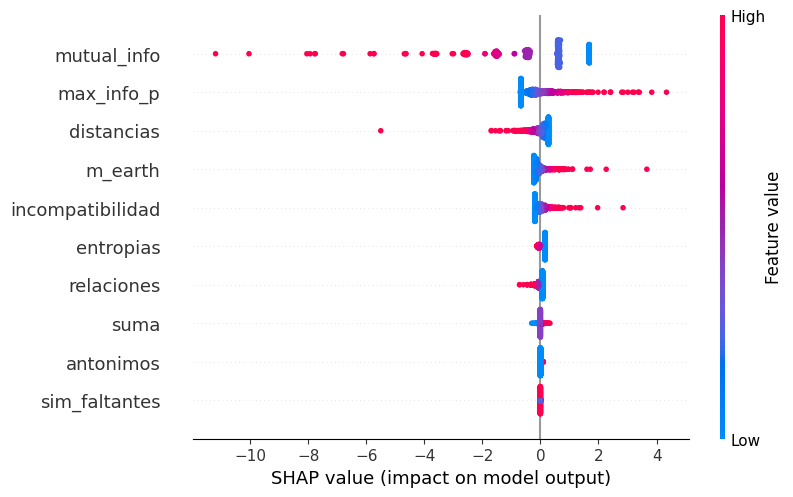

In [1073]:
shap.plots.beeswarm(shap_values)

In [1074]:
ind = 1
shap.plots.force(shap_values[ind])

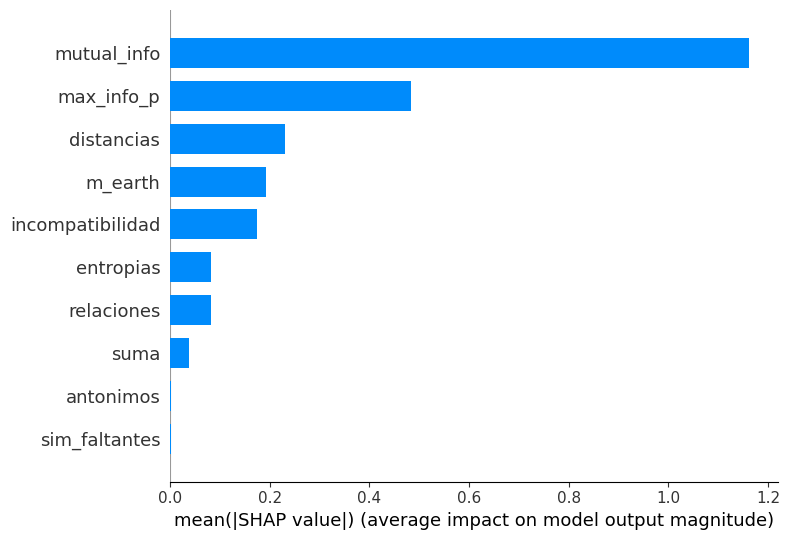

In [1075]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

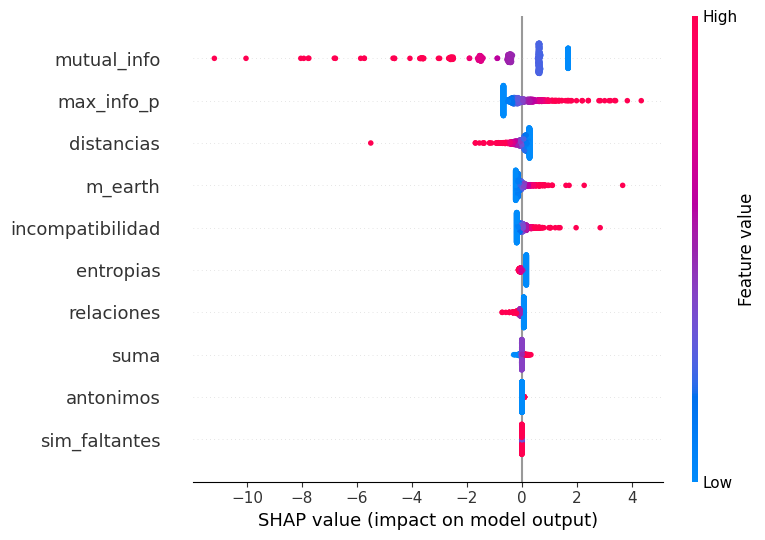

In [1076]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

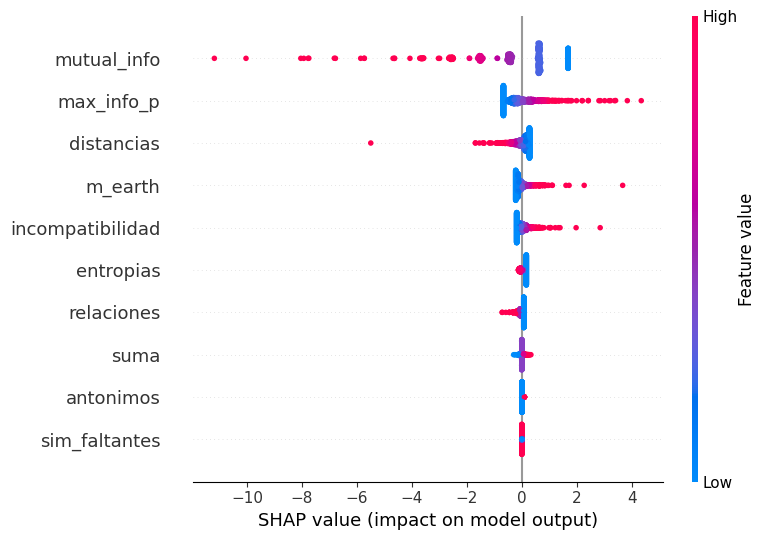

In [1077]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

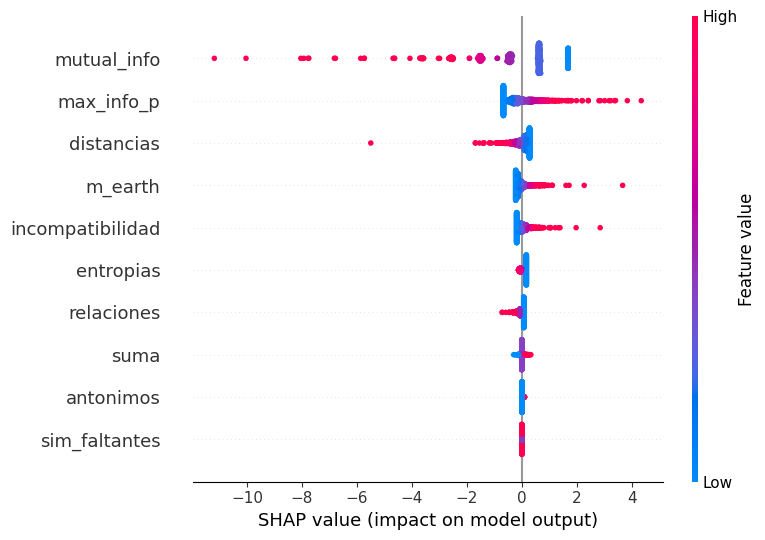

In [1078]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [1079]:
explainer.expected_value

-0.1156015304278508

In [1080]:
shap_values.shape

(800, 10)